### Group 08

| Name  | Matriculation Number  | E-mail  |
| :------- | :----------------------- | :--------- |
| Jonas Maas | 03697372| [mail@jonasmaas.de](mailto:mail@jonasmaas.de) |
| Jiangwei Hao  | 03738359 | [hjwzuibang@outlook.com](mailto:hjwzuibang@outlook.com) |
| Kaicheng Ni   | 03749628 | [kc.ninini@gmail.com](mailto:kc.ninini@gmail.com) |
| Yiming Shan   | 03749627 | [yiming.shan@tum.de](mailto:yiming.shan@tum.de) |
| Zongyue Li    | 03713135 | [zongyue.li@outlook.com](mailto:zongyue.li@outlook.com) |
| Thorben Wigger| 03696666 | [thorben-wigger@web.de](mailto:thorben-wigger@web.de) |



## Curse of Dimensionality
### Task 1
Let $\mathbf{C}_d = \{\mathbf{x}\in \mathbb{R}^p\mid\|\mathbf{x}\|_\infty\leq\frac{d}{2}\}$ denote the $p$-dimensional hypercube of edge length $d$, centered at the orign.
#### *Part A*
Assume $\mathbf{X}$ to be uniformly distributed in $\mathbf{C}_1$. Determine $d$ in dependence of $p$ and $q\in[0, 1]$, such that
$$Pr(\mathbf{X}\in\mathbf{C}_d)=q$$
holds.


$X$ is uniformly distributed on $\mathcal{C}_1$, its probility density function is given by: $ f(x) =\begin{cases}
\dfrac{1}{A^p(\mathcal{C}_1)} & \quad \text{for } x\in \mathcal{C}_1 \\
0 & \quad \text{otherwise} \end{cases}$, where $A^p$ denotes the p-dimensional Lebesgue-measure.

Hence: $A^p(\mathcal{C}_1)=\int\limits_{-\frac{1}{2}}^{\frac{1}{2}}\underbrace{\dots}_{\text{p times}}\int\limits_{-\frac{1}{2}}^{\frac{1}{2}}1dx_1\dots dx_p= 1$  
Therefore: $ f(x) =\begin{cases}
1 & \quad \text{for } x\in \mathcal{C}_1 \\
0 & \quad \text{otherwise} \end{cases}$

Moreover: $Pr(X \in \mathcal{C}_d)=\begin{cases} \dfrac{A^p(\mathcal{C}_d)}{A^p(\mathcal{C}_1)}\quad = \quad A^p(\mathcal{C}_d)
& \quad \text{for } d <1 \\
1 & \quad \text{for } d\ge 1 \end{cases}$ 

So: For $Pr(\mathbf{X}\in\mathcal{C}_d) = q$ follows for $q=1$ that $d\ge 1$

Assume: $q\leq1$. Then we have $Pr(\mathbf{X}\in\mathcal{C}_d)=A^p(\mathcal{C}_d)=\int\limits_{-\frac{d}{2}}^{\frac{d}{2}}\underbrace{\dots}_{\text{p times}}\int\limits_{-\frac{d}{2}}^{\frac{d}{2}}1dx_1\dots dx_p= d^p$

Finally: it follows for $q\leq1$ that $Pr(\mathbf{X}\in\mathcal{C}_d) = q \quad \Leftrightarrow \quad d=\sqrt[p]{q}$




#### *Part B*
Let the components of the $p$-dimensional random variable $\mathbf{X}^p$ be independent and have the standard normal distribution. It is known that $Pr(|\mathbf{X}^1|\leq2.576)=0.99$. For an arbitrary $p$, determine the probability $Pr(\|\mathbf{X}^p\|_\infty\gt2.576)$ for any of the components of $\mathbf{X}^p$ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value for $p = 2$, $p = 3$ and $p = 500$.


$$
\begin{align*}
& Pr(\Vert X^p\Vert_{\infty} > 2,576) \\
& = 1 - Pr(\vert X^1\vert \le 2,576 \ \cap \ \vert X^2\vert \le 2,576 \ \cap \ ... \ \cap \ \vert X^p\vert \le 2,576) \\
& = 1 - \prod_{i = 1}^{p} Pr(\vert X^i\vert \le 2,576) \\
& = 1 - 0.99^p  \\
\end{align*}
$$


For $p = 2$, $p = 3$ and $p = 500$ :

$$
\begin{align*}
& Pr(\|\mathbf{X}^2\|_\infty\gt2.576) = 1 - (0.99)^2 = 0.0199 \\
& Pr(\|\mathbf{X}^3\|_\infty\gt2.576) = 1 - (0.99)^3 \approx 0.0297 \\
& Pr(\|\mathbf{X}^{500}\|_\infty\gt2.576) = 1 - (0.99)^{500} \approx 0.9934 \\
\end{align*}
$$



### Task 2
Provide the PYTHON code to the following tasks (the code needs to be commented properly):
#### *Part A*
Sample $100$ uniformly distributed random vectors from the box $[-1, 1]^{d}$ for $d = 2$.

Text(0.5, 1.0, 'Uniformly random vectors in $[-1, 1]^2$')

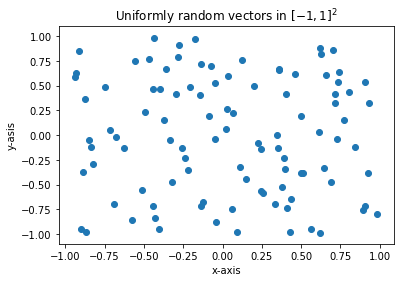

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt


def uniformly_distributed_data_gen(n, d):
    """
    Generate a uniform distribution such that all data points are belongs to [-1, 1]^d
    
    :param n: number of data points
    :param d: dimension of each data point

    :return: the generated uniform distribution
    """
    
    return np.random.uniform(low=-1,high=1,size=(n, d))

random_vectors = uniformly_distributed_data_gen(100, 2)
plt.scatter(random_vectors[:, 0], random_vectors[:, 1])
plt.xlabel('x-axis')
plt.ylabel('y-asis')
plt.title('Uniformly random vectors in $[-1, 1]^2$')

#### *Part B*
For each of the $100$ vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors $\mathbf{x}$, $\mathbf{y}$ the cosine of the angle between the two vectors is defined as

$$\cos{((\mathbf{x}, \mathbf{y}))} = \frac{\langle \mathbf{x}, \mathbf{y} \rangle}{\|\mathbf{x}\|\|\mathbf{y}\|}.$$


In [6]:
def avg_min_angles(m):
    """
    calculate average minimum angles for the given distribution
    
    :param m: distribution with size [n, d], where n denotes the number of data points and d denotes
              dimension of each data point

    :return: the average minimum angles
    """
    m_support = m / np.linalg.norm(m, axis=1, keepdims=True)  # normalize the matrix m
    np.nan_to_num(m_support)  # fill 0 to replace NaN value in the normalized matrix m_support
    
    # calculate a cosine similarity matrix that contains n * n elements. 
    # the element Ei,j means the cos similarity between ith and jth data point from the distribution.
    cos_sim_mat = np.matmul(m_support, m_support.T)  
    
    # remove diagonal elements because the diagonal elements are the cos sim between data points themselves
    # reshape it to size = (m.shape(0), m.shape(0) - 1)
    cos_sim_mat = cos_sim_mat[~np.eye(cos_sim_mat.shape[0], dtype=bool)].reshape(cos_sim_mat.shape[0], -1)  
    
    angle_matrix = np.arccos(cos_sim_mat)
    
    return np.mean(np.min(angle_matrix, axis=1))  # get min along rows are then compute the mean value

In [7]:
average_minimum_angles = avg_min_angles(uniformly_distributed_data_gen(100, 2))
print("Average Minimum Angels of the 100 vectors of dimension 2: {}, \nCorresponding Degree: {}°".format(average_minimum_angles, math.degrees(average_minimum_angles)))

Average Minimum Angels of the 100 vectors of dimension 2: 0.03217849146536236, 
Corresponding Degree: 1.8436917520630032°


#### *Part C*
Repeat the above for dimensions $d = 1, ..., 1000$ and use the results to plot the average minimum angle against the dimension.

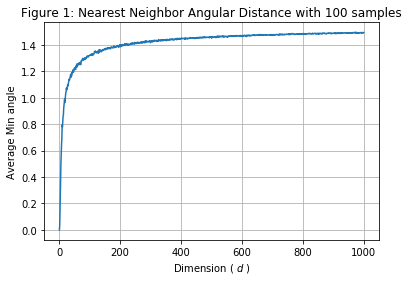

In [8]:
def list_ave_min_angle(n, dim):
    """
    calculate a list of average minimum angles for distributions generated by a given range of dimension
    and number of data points 
    
    :param n: number of data points
    :param d: dimension of each data point
    
    :return: the average minimum angles
    """
    assert isinstance(dim, np.ndarray) or isinstance(dim, list), "Param dim should be array or list."
    return list(map(lambda d: avg_min_angles(uniformly_distributed_data_gen(n, d)), dim))
    
dim = np.arange(0, 1000) + 1

avg_min_all = list_ave_min_angle(100, dim)
plt.plot(dim, avg_min_all)
plt.xlabel('Dimension ( $d$ )')
plt.ylabel('Average Min angle')
plt.title('Figure 1: Nearest Neighbor Angular Distance with 100 samples')

plt.grid()


#### *Part D*
Give an interpretation of the result. What conclusion can you draw for $2$ randomly sampled vectors in a $d$-dimensional space?

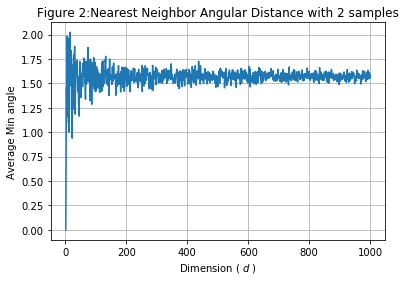

In [9]:
avg_min_all = list_ave_min_angle(2, dim)
plt.plot(dim, avg_min_all)
plt.xlabel('Dimension ( $d$ )')
plt.ylabel('Average Min angle')
plt.title('Figure 2:Nearest Neighbor Angular Distance with 2 samples')

plt.grid()

- From figure 1 and figure 2, we can observe that the mean minimum angle distance of data points converges to around $90$ grad with increasing dimensions of data. This means, $2$ randomly sampled high dimensional datapoints are likely to be perpendicular to each other. So, the $2$ data points are increasingly equidistant in termas of angular distance from their nearest neighbor in high dimensional space. Thus, distance-based models such as kNN won't work for high dimensional data.

#### *Part E*
Does the result change if the sample size increases?

In [10]:
def n_list_ave_min_angle(n, dim):
    """
    Return a list of average angles between n nearest neighbouring vectors sampled from [-1, 1]^d.
    
    :param n: number of data points
    :param d: dimension of each data point
    
    :returns: a len(n)*len(dim) array with average nearest neighbor angular distances
    """
    return list(map(lambda num: np.asarray(list_ave_min_angle(num, dim)), n))
    
n = np.arange(20, 501, 50)
n_avg_min_angles = n_list_ave_min_angle(n, dim)

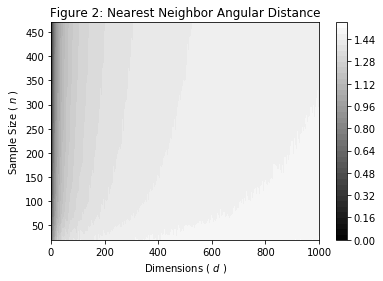

In [11]:
# contour-plot avg of nearest neighbor angular distances
cmap = plt.cm.get_cmap("gray")

plt.contourf(dim, n, n_avg_min_angles, 40, cmap=cmap)
plt.xlabel('Dimensions ( $d$ )')
plt.ylabel('Sample Size ( $n$ )')
plt.title('Figure 2: Nearest Neighbor Angular Distance')
plt.colorbar()

Text(0.5, 1.0, 'NN Angular distance, $d$=2')

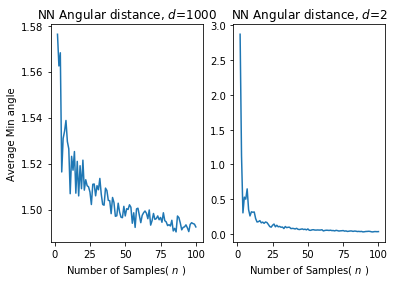

In [13]:
def n_number(num, d=1000):
    """
    calculate a list of average minimum angles for distributions generated by a given range of num of
    data points and dimension of the data.
    
    :param n: number of data points
    :param d: dimension of each data point
    
    :return: the average minimum angles
    """

    return list(map(lambda n: avg_min_angles(uniformly_distributed_data_gen(n, d)), num))
    
num = np.arange(2,101)
avg_min_all_1 = n_number(num)

plt.subplot(1, 2, 1)
plt.plot(num, avg_min_all_1)
plt.xlabel('Number of Samples( $n$ )')
plt.ylabel('Average Min angle')
plt.title('NN Angular distance, $d$=1000')


avg_min_all_2 = n_number(num, 2)
plt.subplot(1, 2, 2)
plt.plot(num, avg_min_all_2)
plt.xlabel('Number of Samples( $n$ )')
plt.title('NN Angular distance, $d$=2')

From the contour plot and 2 examples plot of $d$ = $1000$, $d$=$2$, we can observe that in high dimensions, the change of the average angle is marginal, so the samples size has very litte impact on the average angle. In low dimensions in contrast, the samples size has a big impact on the average angle.

## Statistical Decision Making
### Task 3

Answer the following questions. All answers must be justified.

#### *Part A*
The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event $X=1$ and $Y=1$ is $0.02$). Is this table a probability table? If so, why?

#### *Answer*: <br>
Yes，it is a probability table.  
$$\because \sum^{}_{X} \sum^{}_{Y} p(x,y)=0.4+0.14+0.05+0.02+0.26+0.13=1$$  
and  $$p(x,y)\geqslant 0,\forall (x,y)\in \left\{ X,Y\right\}$$  


#### *Part B*
Based on Figure 1 give the conditional expectation $\mathbb{E}_{Y \mid X=2}[Y]$ and the probability of the event $X=1$ under the condition that $Y=3$.

#### *Answer*: <br>
conditional expectation:

$$\mathbb{E}_{Y | X=2}[Y] = \sum_{Y} Y \operatorname{Pr}(Y | X=2)\\   
= \sum_{Y} Y \frac{\operatorname{Pr}(Y \cap X=2)}{\operatorname{Pr}(X=2)}\\   
=\frac{1}{0.4+0.14+0.05}(1 \times 0.4+2 \times 0.14+3 \times 0.05)\\  
=\frac{83}{59}   \approx 1.4068$$
conditional probability:
$$\operatorname{Pr}(X=1 | Y=3)=\frac{\operatorname{Pr}(X=1 \cap Y=3)}{\operatorname{Pr}(Y=3)}\\
=\frac{0.13}{0.13+0.05}\\
=\frac{13}{18}\approx 0.722$$

#### *Part C*
Is the function $p(x, y)$ given by
$$
p(x, y) = \begin{cases}
1 & \quad \text{for } 0\leq x\leq 1\text{, } 0\leq y\leq \frac{1}{2} \\
0 & \quad \text{otherwise} \end{cases}
$$
a joint density function for two random variables?

#### *Answer:* <br>
If the function $p(x,y)$ is a joint density function for two random variables, then $\int^{}_{y} \int^{}_{x} p(x,y)dxdy$ should be 1

$$\int_{y} \int_{x} p(x, y) \mathrm{d} x \mathrm{d} y=\int_{0}^{\frac{1}{2} } \int_{0}^{1} 1 \mathrm{d} x \mathrm{d} y\\
=\int_{0}^{\frac{1}{2} } \left.x\right|_{0} ^{1} \mathrm{d} y\\
=\int_{0}^{\frac{1}{2} } 1 \mathrm{d} y\\
=\left.y\right|_{0} ^{\frac{1}{2} }\\
=\frac{1}{2} \neq 1$$

$\therefore $ it is not a joint density function  

#### *Part D*
For two random variables $X$ and $Y$ the joint density function is given by
$$
p(x, y) = \begin{cases}
2\mathit{e}^{-(x+y)} & \quad \text{for } 0\leq x\leq y\text{, } 0\leq y \\
0 & \quad \text{otherwise.} \end{cases}
$$
What are the marginal density functions for $X$ and $Y$ respectively?

#### *Answer:* <br>
marginal density function for X:  

 
$$p(x)=\int_{x}^{\infty} p(x, y) \mathrm{d} y\\
=\int_{x}^{\infty} 2 e^{-(x+y)}d y \\
= -2 e^{-(x+y)}\left.\right|_{x} ^{\infty} \\
= 2 e^{-2x}$$


marginal density function for Y:

$$p(y)=\int_{0}^{y} p(x, y) \mathrm{d} x\\
=\int_{0}^{y} 2 e^{-(x+y)}d x\\
= -2 e^{-(x+y)}\left.\right|_{0} ^{y}\\
= -2 e^{-2y}+2 e^{-y}$$


#### *Part E*
Let the joint density function of two random variables $X$ and $Y$ be given by
$$
p(x, y) = \begin{cases}
\frac{1}{15}(2x+4y) & \quad \text{for } 0\leq x\leq 3\text{, } 0\leq y\leq 1 \\
0 & \quad \text{otherwise.} \end{cases}
$$
Determine the probability for $X\leq 2$ under the condition that $Y = \frac{1}{2}$.

#### *Answer*: <br>
$\because p(x,y)=p(x|y)p(y)$  
$\therefore$ To calculate $p(x≤2|y=\frac{1}{2})$, we should know $p(x\leq 2\bigcap y=\frac{1}{2} )$ and $p(y)$  
marginal density function for Y:  
$$p(y)=\int_x p(x,y)dx\\
= \int^3 _0 p(x,y)dx\\
= \int^3 _0 \frac{1}{15}(2x+4y)dx\\
= \frac{1}{15} (x^2+4xy)|^3 _0\\
= \frac{1}{5} (4y+3)$$  \\
$$\therefore p(x≤2|y=\frac{1}{2})
=\int\frac{p(x≤2,y=\frac{1}{2})}{p(y)}dx\\
=\int^2 _0\frac{\frac{1}{15}(2x+4y)}{\frac{1}{5} (4y+3)}|_{y=\frac{1}{2}}dx\\
=\int^2 _0\frac{2x+4y}{12y+9}|_{y=\frac{1}{2}}dx\\
=\int^2_0\frac{2x+2}{15}dx\\
=\frac{1}{15}(x^2+2x)|^2 _0\\
=\frac{8}{15}$$

### Task 4
Show that the covariance matrix $\mathbf{C}$ of any random variable $\mathbf{X}\in\mathbb{R}^p$ is symmetric positive semidefinite, i.e. $\mathbf{C}=\mathbf{C}^T$ and $\mathbf{x}^T\mathbf{Cx}\geq 0$ for any covariance matrix $\mathbf{C}\in\mathbb{R}^{p\times p}$ and any $\mathbf{x}\in\mathbb{R}^p$.

#### *Answer*: <br>
Define:  
$\mathbf{C}$ : the covariance matrix of $\mathbf{X}$, $\mathbf{X}\in \mathbb{R}^{p}$  
$\mathbf{\mu}$ : the mean of $\mathbf{X}$ ( $\mathbb{E}(\mathbf{X})=\mathbf{\mu}$ )  
 

$$C=E[(x-\mu)(x-\mu)^T]$$

$$
C^T=E[(x-\mu)(x-\mu)^T]^T\\ 
=E[(x-\mu)^{TT}(x-\mu)^T]\\
=E[(x-\mu)(x-\mu)^T]\\
=C\\
$$
The covariance matrix is symmtric($C=C^T$)


\
To prove $\mathbf{x^TCx}\geq0$:  
\begin{equation}
    \begin{split}
    \mathbf{C} &= \mathbb{E}[(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T]\\\\
    \mathbf{x}^T\mathbf{Cx} &= \mathbf{x}^T\mathbb{E}[(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T]\mathbf{x}\\\\
    & = \mathbb{E}[\mathbf{x}^T(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T\mathbf{x}]\\\\\
    & = \mathbb{E}[(\mathbf{x}^T(\mathbf{X}-\mathbf{\mu}))(\mathbf{x}^T(\mathbf{X}-\mathbf{\mu}))^T]\\\\\
    & = \mathbb{E}[\left| \left| x^{T}(X-\mu )\right|  \right|^{2}]\geqslant 0
    \end{split}
\end{equation}  
   $\text{$\mathbf{x}^T\mathbf{Cx} \geq 0$ is proved.}$